In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re
from sklearn.preprocessing import LabelEncoder

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("FlightDataAnalysis").getOrCreate()
fdf_nonstop=spark.read.csv("gs://flight-data-bucket-551/processedcsv",header=True, inferSchema=True)


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/05 23:15:52 INFO SparkEnv: Registering MapOutputTracker
23/12/05 23:15:52 INFO SparkEnv: Registering BlockManagerMaster
23/12/05 23:15:52 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
23/12/05 23:15:52 INFO SparkEnv: Registering OutputCommitCoordinator


In [5]:
fdf_nonstop=fdf_nonstop.toPandas()


23/12/05 23:18:40 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


/tmp/ipykernel_13587/3039413847.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.histplot(fdf_nonstop['segmentsAirlineName'].astype(str)).set_xticklabels(sns.histplot(fdf_nonstop['segmentsAirlineName'].astype(str)).get_xticklabels(), rotation=40, ha="right")


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, '')]

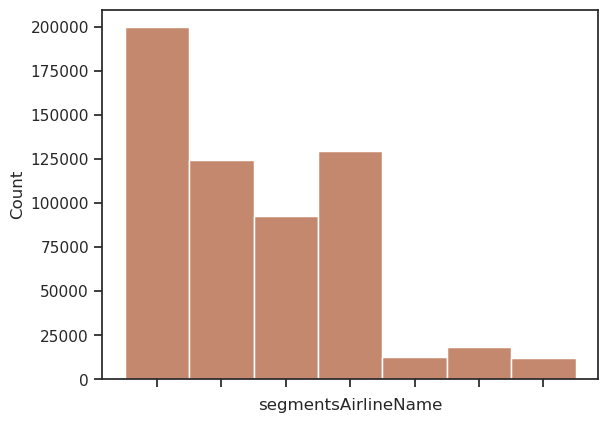

In [6]:
sns.set_theme(style="ticks")
sns.histplot(fdf_nonstop['segmentsAirlineName'].astype(str)).set_xticklabels(sns.histplot(fdf_nonstop['segmentsAirlineName'].astype(str)).get_xticklabels(), rotation=40, ha="right")

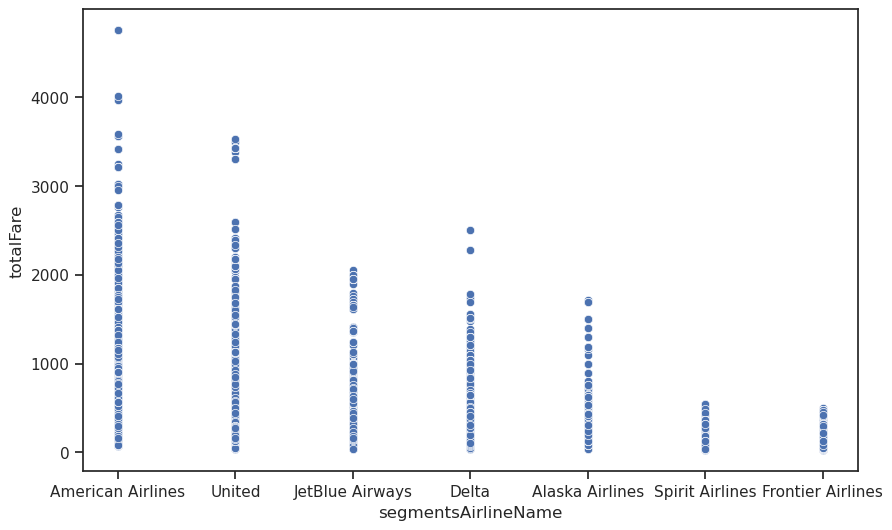

In [7]:
plt.figure(figsize=(10,6)) 
sns.scatterplot(data=fdf_nonstop, x="segmentsAirlineName", y="totalFare")
plt.show()

In [8]:
fdf_american_airlines = fdf_nonstop[fdf_nonstop['segmentsAirlineName'] == 'American Airlines']
fdf_american_airlines['totalFare'].describe()

count    199675.000000
mean        303.704897
std         199.962880
min          68.600000
25%         190.600000
50%         258.600000
75%         367.610000
max        4752.600000
Name: totalFare, dtype: float64

/tmp/ipykernel_13587/1770301911.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(fdf_american_airlines['startingAirport'], rotation=40, ha="right")
/tmp/ipykernel_13587/1770301911.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(fdf_american_airlines['destinationAirport'], rotation=40, ha="right")


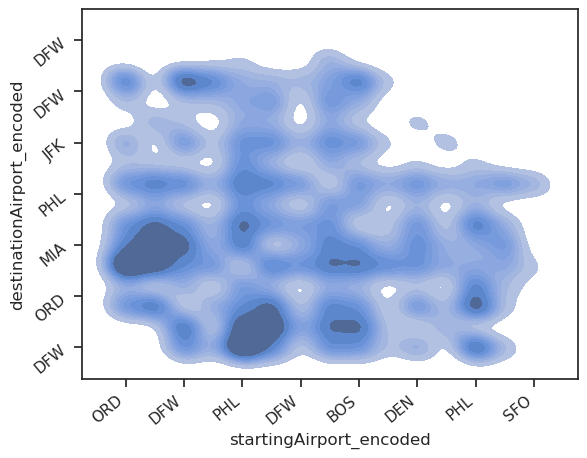

In [9]:
ax = sns.kdeplot(data=fdf_american_airlines, x="startingAirport_encoded",y= 'destinationAirport_encoded',fill= True)
ax.set_xticklabels(fdf_american_airlines['startingAirport'], rotation=40, ha="right")
ax.set_yticklabels(fdf_american_airlines['destinationAirport'], rotation=40, ha="right")
plt.show()

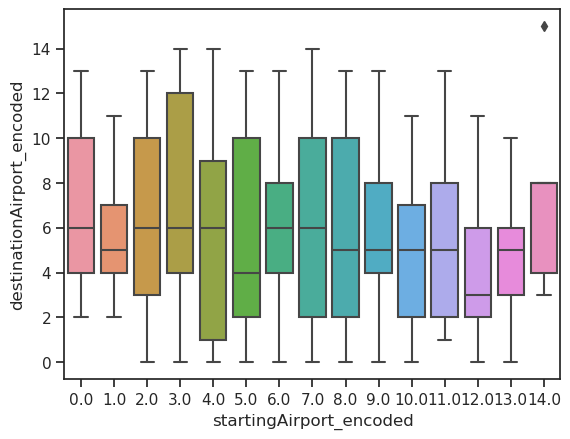

In [10]:
sns.boxplot(data=fdf_american_airlines, x="startingAirport_encoded",y= 'destinationAirport_encoded')
plt.show()

<AxesSubplot:xlabel='totalFare', ylabel='totalTravelDistance'>

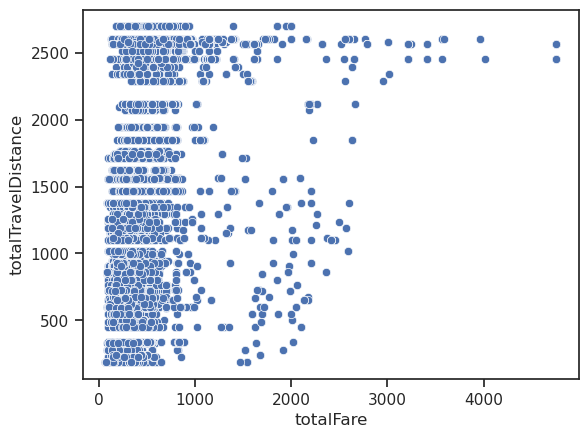

In [11]:
sns.scatterplot(data=fdf_american_airlines, x="totalFare",y= 'totalTravelDistance')


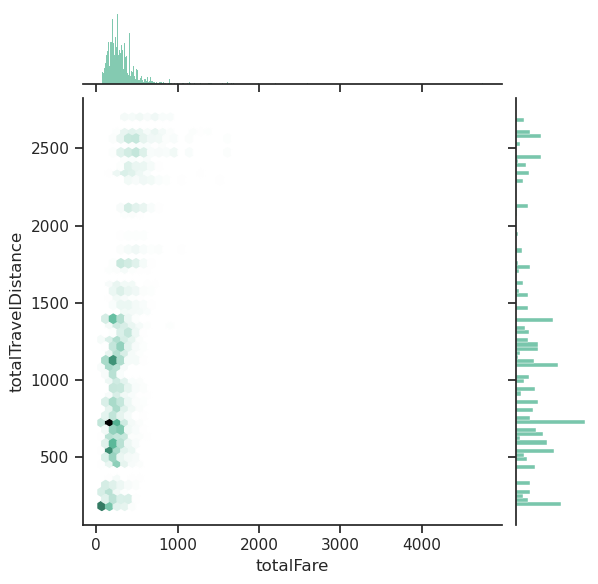

In [12]:
sns.set_theme(style="ticks")

ax_american = sns.jointplot(data=fdf_american_airlines, x="totalFare",y= 'totalTravelDistance', kind="hex", color="#4CB391")

In [13]:
print(fdf_american_airlines['time_gap'])

0         11
2         17
8         56
9         34
10        14
          ..
589014    40
589016     6
589017    46
589019    12
589021    12
Name: time_gap, Length: 199675, dtype: int32


<AxesSubplot:xlabel='time_gap', ylabel='totalFare'>

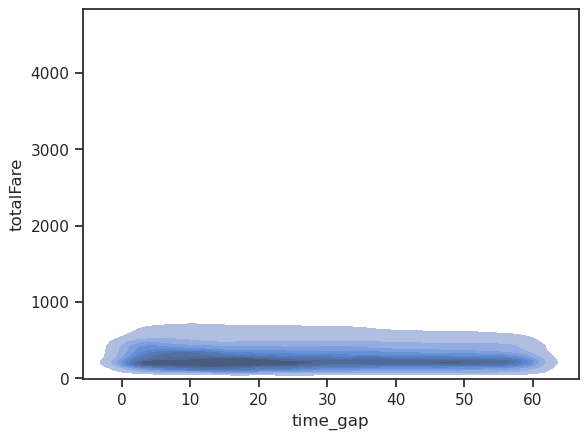

In [14]:
sns.kdeplot(data=fdf_american_airlines, x="time_gap",y= 'totalFare',fill= True)

<AxesSubplot:xlabel='totalFare', ylabel='totalTravelDistance'>

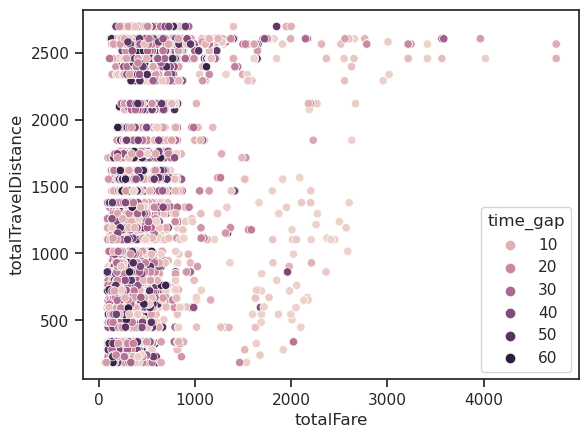

In [15]:
sns.scatterplot(data=fdf_american_airlines, x="totalFare",y= 'totalTravelDistance', hue = 'time_gap')

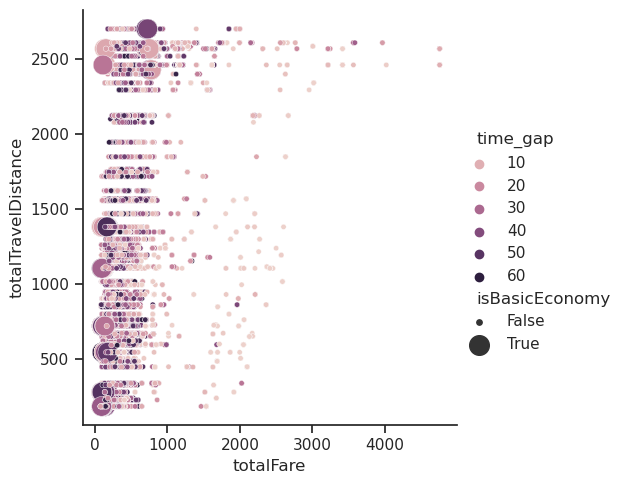

In [16]:
sns.relplot(data=fdf_american_airlines, x="totalFare",y= 'totalTravelDistance', hue = 'time_gap', size='isBasicEconomy', sizes=(200, 15))

In [17]:
fdf_Delta = fdf_nonstop[fdf_nonstop['segmentsAirlineName'] == 'Delta']

/tmp/ipykernel_13587/3116782466.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(fdf_Delta['startingAirport'], rotation=40, ha="right")
/tmp/ipykernel_13587/3116782466.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(fdf_Delta['destinationAirport'], rotation=40, ha="right")


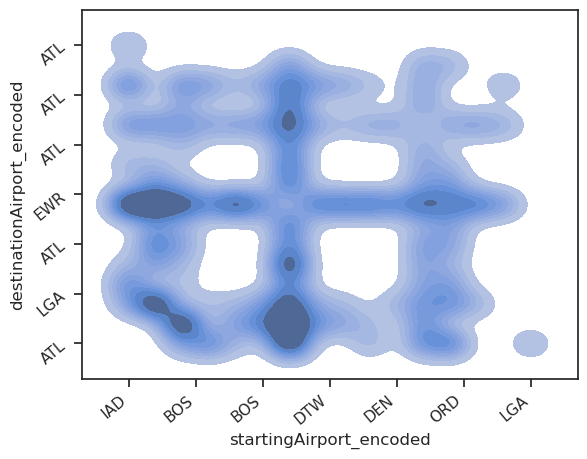

In [18]:
ax = sns.kdeplot(data=fdf_Delta, x="startingAirport_encoded",y= 'destinationAirport_encoded',fill= True)
ax.set_xticklabels(fdf_Delta['startingAirport'], rotation=40, ha="right")
ax.set_yticklabels(fdf_Delta['destinationAirport'], rotation=40, ha="right")
plt.show()

<AxesSubplot:xlabel='startingAirport_encoded', ylabel='destinationAirport_encoded'>

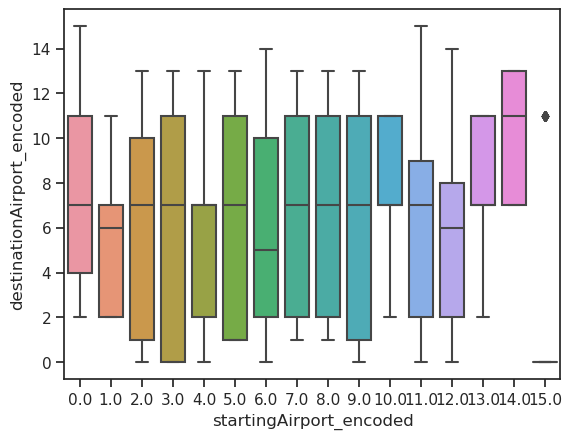

In [19]:
sns.boxplot(data=fdf_Delta, x="startingAirport_encoded",y= 'destinationAirport_encoded')

<AxesSubplot:xlabel='totalFare', ylabel='totalTravelDistance'>

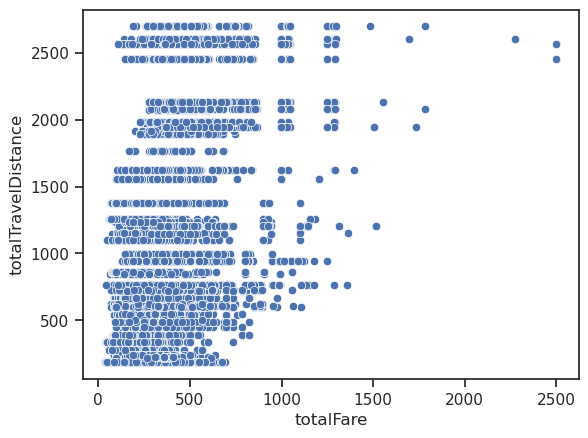

In [20]:
sns.scatterplot(data=fdf_Delta, x="totalFare",y= 'totalTravelDistance')

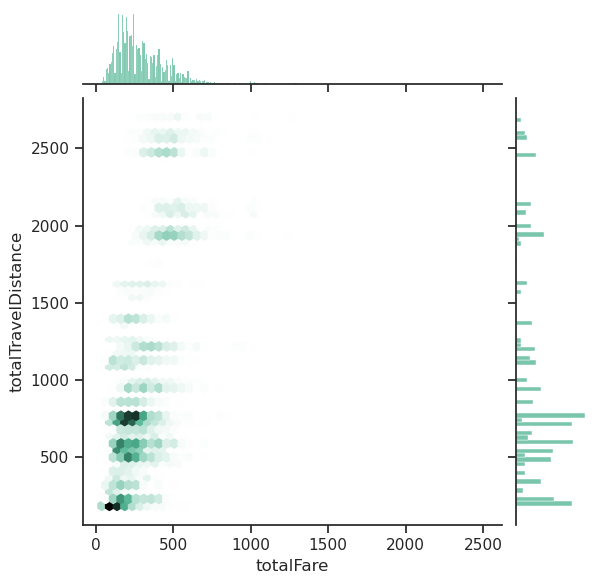

In [21]:
sns.set_theme(style="ticks")

ax_delta = sns.jointplot(data=fdf_Delta, x="totalFare",y= 'totalTravelDistance', kind="hex", color="#4CB391")

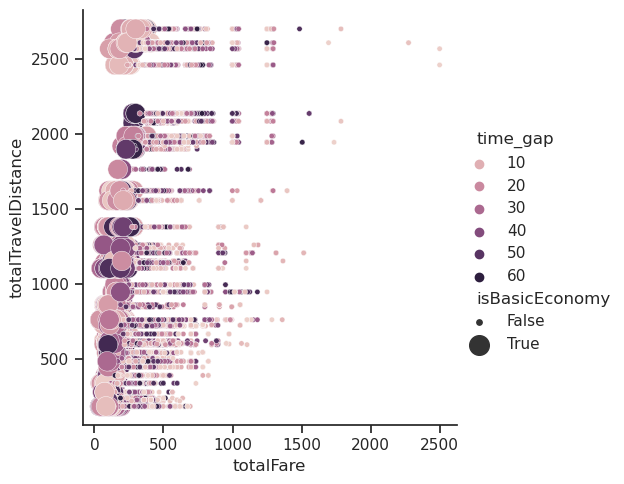

In [22]:
sns.relplot(data=fdf_Delta, x="totalFare",y= 'totalTravelDistance', hue = 'time_gap', size='isBasicEconomy', sizes=(200, 15))

In [41]:
fdf_american_Delta_united = fdf_nonstop[
    (fdf_nonstop['segmentsAirlineName'] == 'American Airlines') |
    (fdf_nonstop['segmentsAirlineName'] == 'Delta') |
    (fdf_nonstop['segmentsAirlineName'] == 'United')
]

In [42]:
fdf_american_Delta_united = fdf_american_Delta_united.groupby(['segmentsAirlineName', 'startingAirport', 'destinationAirport','totalTravelDistance','isBasicEconomy']).agg({'totalFare': ['mean', 'median', 'min', 'max']})

In [43]:
fdf_american_Delta_united.head(15)

totalFare  \
                                                                                                 mean   
segmentsAirlineName startingAirport destinationAirport totalTravelDistance isBasicEconomy               
American Airlines   ATL             BOS                947.0               False           370.425038   
                                    CLT                228.0               False           262.894208   
                                    DFW                725.0               False           269.167148   
                                    JFK                762.0               False           250.302365   
                                    LAX                1943.0              False           447.283507   
                                    LGA                762.0               False           221.813089   
                                    MIA                596.0               False           221.012999   
                                    ORD                600.0               False           286.722131   
                                    PHL                667.0               False           296.054299   
                    BOS             ATL                947.0               False           287.375257   
                                    CLT                728.0               False           192.039757   
                                    DEN                1763.0              False           427.824375   
                                    DFW                1556.0              False           331.677839   
                                    DTW                622.0               False           251.685766   
                                    EWR                185.0               False           157.383198   

                                                                                                   \
                                                                                           median   
segmentsAirlineName startingAirport destinationAirport totalTravelDistance isBasicEconomy           
American Airlines   ATL             BOS                947.0               False           358.60   
                                    CLT                228.0               False           253.61   
                                    DFW                725.0               False           259.60   
                                    JFK                762.0               False           214.35   
                                    LAX                1943.0              False           408.60   
                                    LGA                762.0               False           198.60   
                                    MIA                596.0               False           202.60   
                                    ORD                600.0               False           259.60   
                                    PHL                667.0               False           278.60   
                    BOS             ATL                947.0               False           249.35   
                                    CLT                728.0               False           178.60   
                                    DEN                1763.0              False           439.60   
                                    DFW                1556.0              False           317.60   
                                    DTW                622.0               False           224.35   
                                    EWR                185.0               False           123.61   

                                                                                                   \
                                                                                              min   
segmentsAirlineName startingAirport destinationAirport totalTravelDistance isBasicEconomy           
American Airlines   ATL             BOS                947.0               Fals

In [44]:
fdf_american_Delta_united_reset = fdf_american_Delta_united.reset_index()

In [45]:
fdf_american_Delta_united_reset.head(15)

segmentsAirlineName startingAirport destinationAirport totalTravelDistance  \
                                                                                
0    American Airlines             ATL                BOS               947.0   
1    American Airlines             ATL                CLT               228.0   
2    American Airlines             ATL                DFW               725.0   
3    American Airlines             ATL                JFK               762.0   
4    American Airlines             ATL                LAX              1943.0   
5    American Airlines             ATL                LGA               762.0   
6    American Airlines             ATL                MIA               596.0   
7    American Airlines             ATL                ORD               600.0   
8    American Airlines             ATL                PHL               667.0   
9    American Airlines             BOS                ATL               947.0   
10   American Airlines             BOS                CLT               728.0   
11   American Airlines             BOS                DEN              1763.0   
12   American Airlines             BOS                DFW              1556.0   
13   American Airlines             BOS                DTW               622.0   
14   American Airlines             BOS                EWR               185.0   

   isBasicEconomy   totalFare                           
                         mean  median     min      max  
0           False  370.425038  358.60  148.60   721.81  
1           False  262.894208  253.61   98.60   859.60  
2           False  269.167148  259.60  118.60  1639.60  
3           False  250.302365  214.35  103.60   708.60  
4           False  447.283507  408.60  198.60  1185.60  
5           False  221.813089  198.60   91.60  2057.61  
6           False  221.012999  202.60   89.60   784.60  
7           False  286.722131  259.60   93.60  1718.60  
8           False  296.054299  278.60  108.60  1627.61  
9           False  287.375257  249.35  139.35   690.33  
10          False  192.039757  178.60   93.60  1665.60  
11          False  427.824375  439.60  229.60   722.20  
12          False  331.677839  317.60   98.60  1911.60  
13          False  251.685766  224.35  113.60   615.79  
14          False  157.383198  123.61   68.60   442.64

In [46]:
fdf_american_Delta_united_reset['segmentsAirlineName'].value_counts()

Delta                224
American Airlines    195
United               183
Name: segmentsAirlineName, dtype: int64

<AxesSubplot:xlabel='segmentsAirlineName', ylabel='Count'>

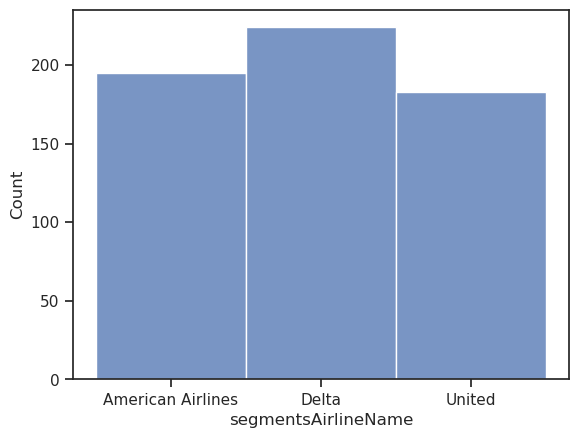

In [47]:
sns.histplot(data=fdf_american_Delta_united_reset, x="segmentsAirlineName")

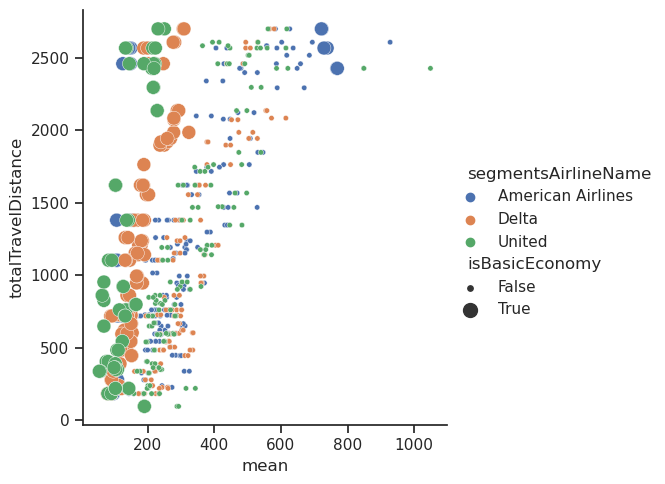

In [50]:
sns.relplot(x=fdf_american_Delta_united_reset["totalFare"]['mean'], y=fdf_american_Delta_united_reset["totalTravelDistance"], hue=fdf_american_Delta_united_reset["segmentsAirlineName"], size=fdf_american_Delta_united_reset["isBasicEconomy"], sizes=(100, 15), legend="full")

/opt/conda/miniconda3/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(


<AxesSubplot:xlabel='mean', ylabel='totalTravelDistance'>

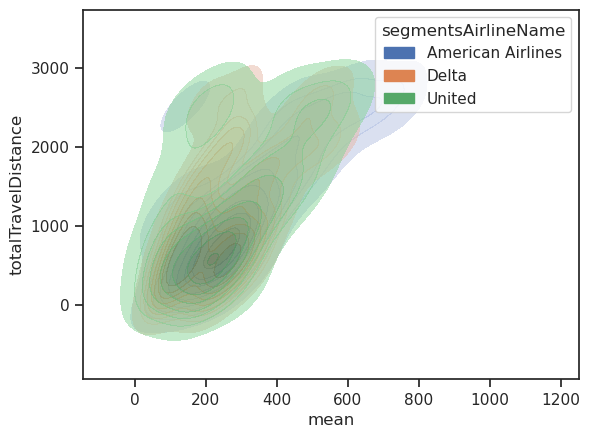

In [51]:
sns.kdeplot(x=fdf_american_Delta_united_reset["totalFare"]['mean'],y= fdf_american_Delta_united_reset['totalTravelDistance'], hue = fdf_american_Delta_united_reset['segmentsAirlineName'], fill= True, kind="hex", color="#4CB391", alpha=.5)

In [52]:
#Analysis of Bottom 3 Airlines
fdf_alaska_frontier =fdf_nonstop[
    (fdf_nonstop['segmentsAirlineName'] == 'Alaska Airlines') |
    (fdf_nonstop['segmentsAirlineName'] == 'Frontier Airlines')
]

In [53]:
fdf_alaska_frontier = fdf_alaska_frontier.groupby(['segmentsAirlineName', 'startingAirport', 'destinationAirport', 'totalTravelDistance', 'isBasicEconomy']).agg({'totalFare': ['mean', 'median', 'min', 'max']})

In [54]:
fdf_alaska_frontier = fdf_alaska_frontier.reset_index()

In [55]:
fdf_alaska_frontier['segmentsAirlineName'].value_counts()

Frontier Airlines    64
Alaska Airlines      40
Name: segmentsAirlineName, dtype: int64

<AxesSubplot:xlabel='segmentsAirlineName', ylabel='Count'>

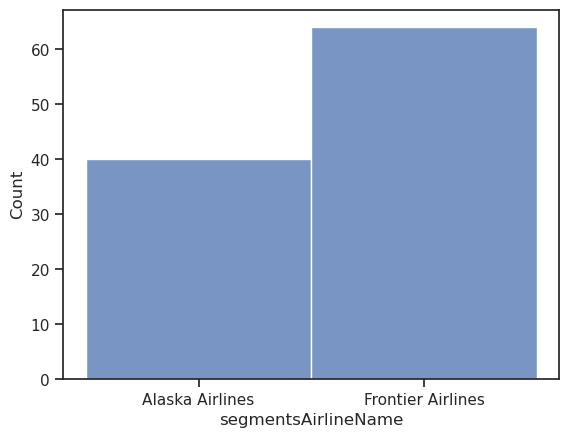

In [56]:
sns.histplot(data=fdf_alaska_frontier, x="segmentsAirlineName")

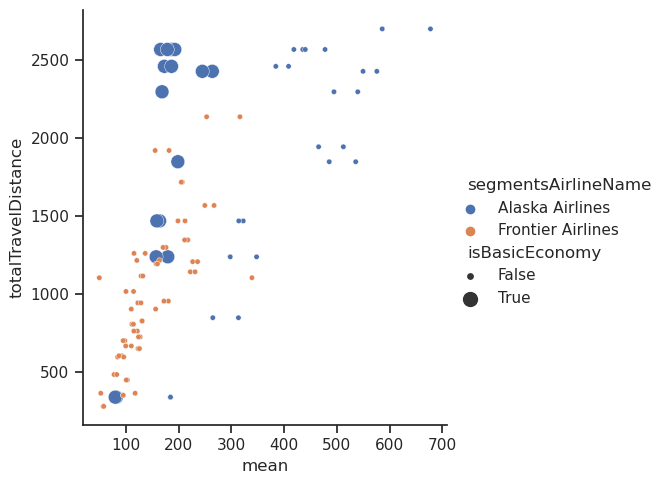

In [57]:
sns.relplot(x=fdf_alaska_frontier["totalFare"]['mean'], y=fdf_alaska_frontier["totalTravelDistance"], hue=fdf_alaska_frontier["segmentsAirlineName"], size=fdf_alaska_frontier["isBasicEconomy"], sizes=(100, 15), legend="full")

/opt/conda/miniconda3/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'kind'
  cset = contour_func(


<AxesSubplot:xlabel='mean', ylabel='totalTravelDistance'>

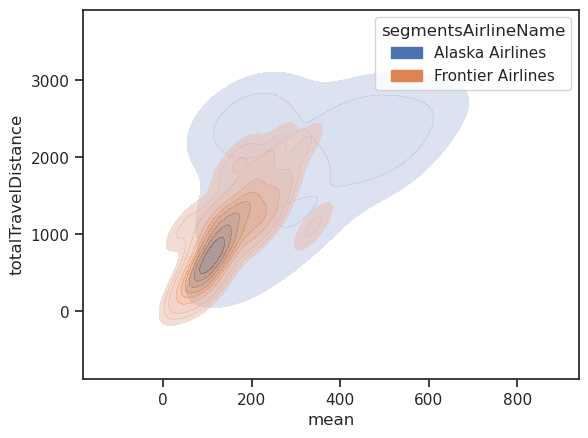

In [58]:
sns.kdeplot(x=fdf_alaska_frontier["totalFare"]['mean'],y= fdf_alaska_frontier['totalTravelDistance'], hue = fdf_alaska_frontier['segmentsAirlineName'], fill= True, kind="hex", color="#4CB391", alpha=.5)